In [1]:
cd ..

/home/jovyan


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import lib.lm as lm
from lib.preprocessing import BoxCoxTransformer
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
boston = load_boston()

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
y = boston.target

In [7]:
X.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
415,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32


## Baseline Model

Prior to any feature engineering, we will fit a baseline model using Ridge and Lasso Regressions with some regularization.

In [8]:
results = pd.DataFrame()

In [9]:
results, _, _ = \
    lm.simple_alpha_grid_search(make_pipeline(LinearRegression()), X, y, results, n=1000)

100%|██████████| 1000/1000 [00:02<00:00, 358.14it/s]


In [10]:
results

,alpha,data_preprocessing,model,model_name,test_score,train_score
0,NaN,[],"Pipeline(steps=[('linearregression', LinearReg...",linearregression,0.711009,0.743956


In [11]:
results, train_scores, test_scores = \
    lm.simple_alpha_grid_search(make_pipeline(Lasso()), X, y, results, n=1000)

100%|██████████| 1000/1000 [00:03<00:00, 325.18it/s]


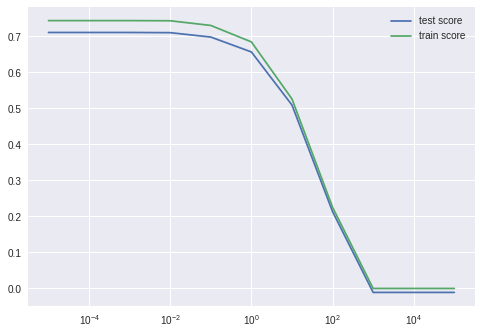

In [12]:
plt.plot(np.logspace(-5,5,11), test_scores, label='test score')
plt.plot(np.logspace(-5,5,11), train_scores, label='train score')
plt.xscale('log')
plt.legend()

In [13]:
results

,alpha,data_preprocessing,model,model_name,test_score,train_score
0,NaN,[],"Pipeline(steps=[('linearregression', LinearReg...",linearregression,0.711009,0.743956
0,0.00001,[],"Pipeline(steps=[('lasso', Lasso(alpha=1.000000...",lasso,0.711009,0.743956


In [14]:
results, train_scores, test_scores = \
    lm.simple_alpha_grid_search(make_pipeline(Ridge()), X, y, results, n=1000)

100%|██████████| 1000/1000 [00:02<00:00, 357.49it/s]


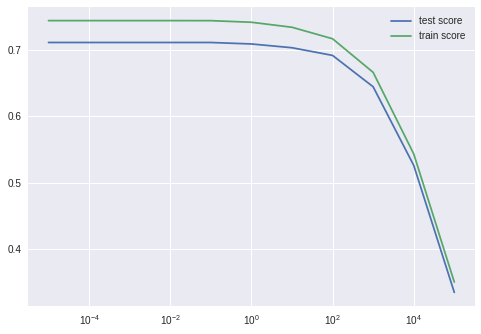

In [15]:
plt.plot(np.logspace(-5,5,11), test_scores, label='test score')
plt.plot(np.logspace(-5,5,11), train_scores, label='train score')
plt.xscale('log')
plt.legend()

In [16]:
results

,alpha,data_preprocessing,model,model_name,test_score,train_score
0,NaN,[],"Pipeline(steps=[('linearregression', LinearReg...",linearregression,0.711009,0.743956
0,0.00001,[],"Pipeline(steps=[('lasso', Lasso(alpha=1.000000...",lasso,0.711009,0.743956
0,0.01000,[],"Pipeline(steps=[('ridge', Ridge(alpha=0.01, co...",ridge,0.711016,0.743956
